## Step 1: Data Preparation & the Assigned Team¶

This step uploads the data set from a CSV file. It also selects the assigned team for this analysis. Do not make any changes to the code block below.

The assigned team is the Chicago Bulls from the years 1996-1998
Click the block of code below and hit the Run button above.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, HTML

nba_orig_df = pd.read_csv('../nbaallelo.csv')
nba_orig_df = nba_orig_df[(nba_orig_df['lg_id']=='NBA') & (nba_orig_df['is_playoffs']==0)]
columns_to_keep = ['game_id','year_id','fran_id','pts','opp_pts','elo_n','opp_elo_n', 'game_location', 'game_result']
nba_orig_df = nba_orig_df[columns_to_keep]

# The dataframe for the assigned team is called assigned_team_df.
# The assigned team is the Chicago Bulls from 1996-1998.
assigned_years_league_df = nba_orig_df[(nba_orig_df['year_id'].between(1996, 1998))]
assigned_team_df = assigned_years_league_df[(assigned_years_league_df['fran_id']=='Bulls')]
assigned_team_df = assigned_team_df.reset_index(drop=True)

display(HTML(assigned_team_df.head().to_html()))
print("printed only the first five observations...")
print("Number of rows in the data set =", len(assigned_team_df))

# To only print one column of the dataframe, use the following code:
print(assigned_team_df['year_id'].head())

,game_id,year_id,fran_id,pts,opp_pts,elo_n,opp_elo_n,game_location,game_result
0,199511030CHI,1996,Bulls,105,91,1598.2924,1531.7449,H,W
1,199511040CHI,1996,Bulls,107,85,1604.3940,1458.6415,H,W
2,199511070CHI,1996,Bulls,117,108,1605.7983,1310.9349,H,W
3,199511090CLE,1996,Bulls,106,88,1618.8701,1452.8268,A,W
4,199511110CHI,1996,Bulls,110,106,1621.1591,1490.2861,H,W


printed only the first five observations...
Number of rows in the data set = 246
0    1996
1    1996
2    1996
3    1996
4    1996
Name: year_id, dtype: int64


## Step 2: Pick Your Team

In this step, you will pick your team. The range of years that you will study for your team is 2013-2015. Make the following edits to the code block below:

Replace ??TEAM?? with your choice of team from one of the following team names.
Bucks, Bulls, Cavaliers, Celtics, Clippers, Grizzlies, Hawks, Heat, Jazz, Kings, Knicks, Lakers, Magic, Mavericks, Nets, Nuggets, Pacers, Pelicans, Pistons, Raptors, Rockets, Sixers, Spurs, Suns, Thunder, Timberwolves, Trailblazers, Warriors, Wizards
Remember to enter the team name within single quotes. For example, if you picked the Suns, then ??TEAM?? should be replaced with 'Suns'.
After you are done with your edits, click the block of code below and hit the Run button above.

In [3]:
# Range of years: 2013-2015 (Note: The line below selects ALL teams within the three-year period 2013-2015. This is not your team's dataframe.
your_years_leagues_df = nba_orig_df[(nba_orig_df['year_id'].between(2013, 2015))]

# The dataframe for your team is called your_team_df.
# ---- TODO: make your edits here ----
your_team_df = your_years_leagues_df[(your_years_leagues_df['fran_id']=='Knicks')]
your_team_df = your_team_df.reset_index(drop=True)

display(HTML(your_team_df.head().to_html()))
print("printed only the first five observations...")
print("Number of rows in the data set =", len(your_team_df))

,game_id,year_id,fran_id,pts,opp_pts,elo_n,opp_elo_n,game_location,game_result
0,201211020NYK,2013,Knicks,104,84,1548.2699,1647.6675,H,W
1,201211040NYK,2013,Knicks,100,84,1557.5126,1535.9276,H,W
2,201211050PHI,2013,Knicks,110,88,1580.3411,1513.0991,A,W
3,201211090NYK,2013,Knicks,104,94,1586.0647,1533.1604,H,W
4,201211130ORL,2013,Knicks,99,89,1594.3969,1421.3483,A,W


printed only the first five observations...
Number of rows in the data set = 246


## Step 3: Data Visualization: Points Scored by Your Team

The coach has requested that you provide a visual that shows the distribution of points scored by your team in the years 2013-2015. The code below provides two possible options. Pick ONE of these two plots to include in your summary report. Choose the plot that you think provides the best visual for the distribution of points scored by your team. In your summary report, you must explain why you think your visual is the best choice.

Click the block of code below and hit the Run button above.
NOTE: If the plots are not created, click the code section and hit the Run button again.

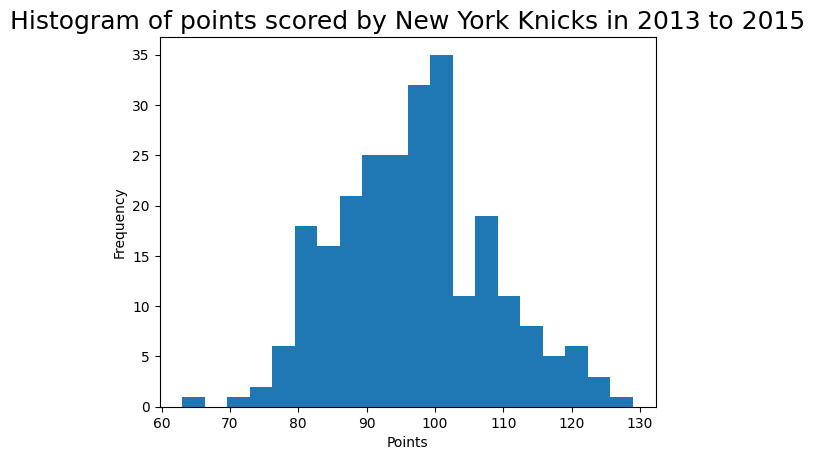

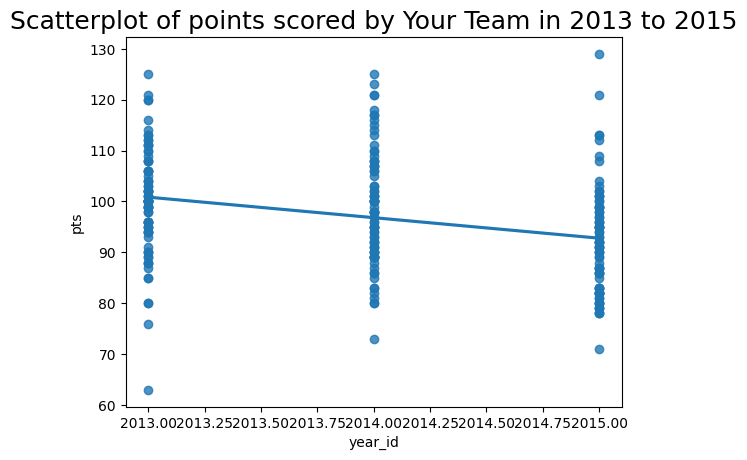

In [5]:
from turtle import color
import seaborn as sns

# Histogram
fig, ax = plt.subplots()
plt.hist(your_team_df['pts'], bins=20)
plt.title('Histogram of points scored by New York Knicks in 2013 to 2015', fontsize=18)
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')
plt.show()
print("")

# Scatterplot
plt.title('Scatterplot of points scored by Your Team in 2013 to 2015', fontsize=18)
sns.regplot(x=your_team_df['year_id'], y=your_team_df['pts'], ci=None)
plt.show()

## Step 4: Data Visualization: Points Scored by the Assigned Team¶

The coach has also requested that you provide a visual that shows a distribution of points scored by the Bulls from years 1996-1998. The code below provides two possible options. Pick ONE of these two plots to include in your summary report. Choose the plot that you think provides the best visual for the distribution of points scored by your team. In your summary report, you will explain why you think your visual is the best choice.

Click the block of code below and hit the Run button above.
NOTE: If the plots are not created, click the code section and hit the Run button again.

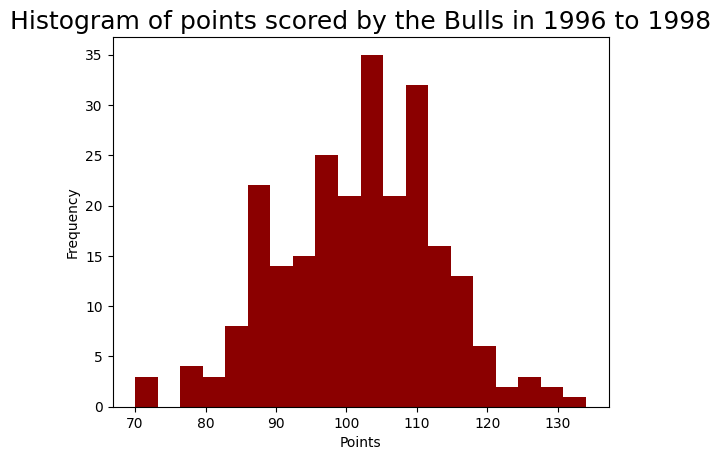

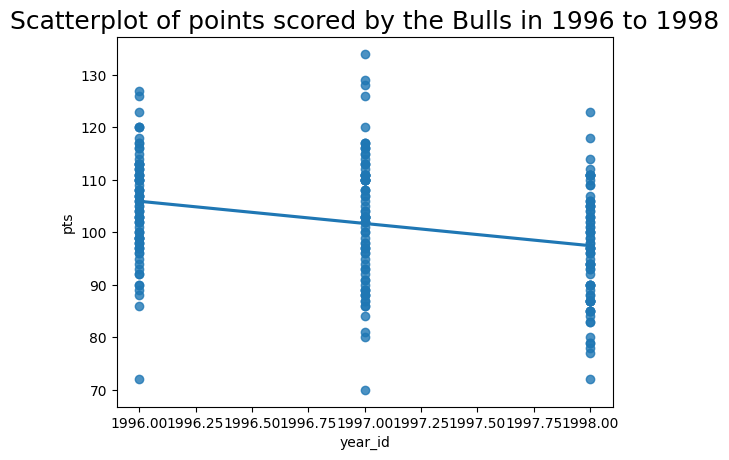

In [6]:
import seaborn as sns

# Histogram
fig, ax = plt.subplots()
plt.hist(assigned_team_df['pts'], bins=20, color='darkred')
plt.title('Histogram of points scored by the Bulls in 1996 to 1998', fontsize=18)
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')
plt.show()

# Scatterplot
plt.title('Scatterplot of points scored by the Bulls in 1996 to 1998', fontsize=18)
sns.regplot(x=assigned_team_df['year_id'], y=assigned_team_df['pts'], ci=None)
plt.show()

## Step 5: Data Visualization: Comparing the Two Teams

Now the coach wants you to prepare one plot that provides a visual of the differences in the distribution of points scored by the assigned team and your team. The code below provides two possible visuals. Choose the plot that allows for the best comparison of the data distributions.

Click the block of code below and hit the Run button above.
NOTE: If the plots are not created, click the code section and hit the Run button again.

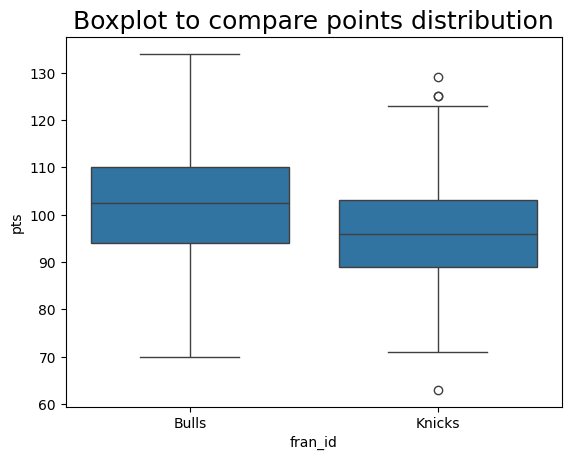

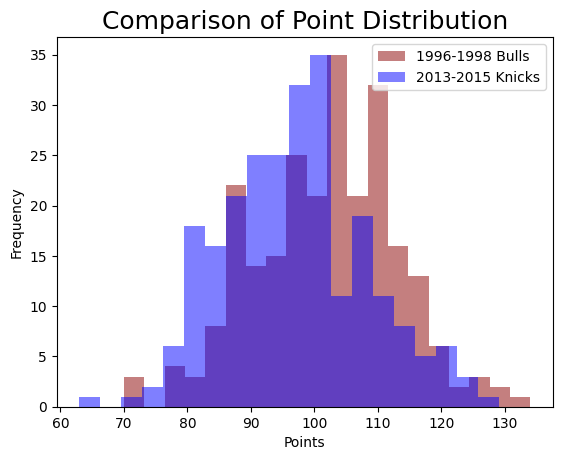

In [7]:
from turtle import color
import seaborn as sns

# First create a dataframe with both teams
both_teams_df = pd.concat((assigned_team_df, your_team_df))


# Side-by-side boxplots
plt.title('Boxplot to compare points distribution', fontsize=18)
sns.boxplot(x='fran_id',y='pts',data=both_teams_df)
plt.show()
print("")

# Histograms
fig, ax = plt.subplots()
plt.hist(assigned_team_df['pts'], 20, alpha=0.5, label='1996-1998 Bulls', color='darkred')
plt.hist(your_team_df['pts'], 20, alpha=0.5, label='2013-2015 Knicks', color='blue')
plt.title('Comparison of Point Distribution', fontsize=18)
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

## Step 6: Descriptive Statistics: Points Scored By Your Time in Home Games

The management of your team wants you to run descriptive statistics on the points scored by your team in the games played at your team's venue in 2013-2015. Calculate descriptive statistics including the mean, median, variance, and standard deviation for points scored by your team played at Home. Make the following edits to the code block below:

Replace ??MEAN_FUNCTION?? with the name of Python function that calculates the mean.
Replace ??MEDIAN_FUNCTION?? with the name of Python function that calculates the median.
Replace ??VAR_FUNCTION?? with the name of Python function that calculates the variance.
Replace ??STD_FUNCTION?? with the name of Python function that calculates the standard deviation.
After you are done with your edits, click the block of code below and hit the Run button above.

In [8]:
print("Points Scored by Your Team in Home Games (2013 to 2015)")
print("-------------------------------------------------------")

your_team_home_df = your_team_df[your_team_df['game_location']=='H'].copy()

# ---- TODO: make your edits here ----
mean = your_team_home_df['pts'].mean()
median = your_team_home_df['pts'].median()
variance = your_team_home_df['pts'].var()
stdeviation = your_team_home_df['pts'].std()

print('Mean =', round(mean,2))
print('Median =', round(median,2))
print('Variance =', round(variance,2))
print('Standard Deviation =', round(stdeviation,2))

# This shows us that there is a skew to the right in the data because the mean is greater than the median, in other words the average is greater than the middle value.
# The variance and standard deviation are measures of the spread of the data.
# The variance is the average of the squared differences from the mean, and the standard deviation is the square root of the variance.
# In this case the best representation of the data is the median because the mean is skewed by the outliers.

Points Scored by Your Team in Home Games (2013 to 2015)
-------------------------------------------------------
Mean = 98.03
Median = 98.0
Variance = 120.61
Standard Deviation = 10.98


## Step 7 - Descriptive Statistics - Points Scored By Your Time in Away Games

The management also wants you to run descriptive statistics on the points scored by your team in games played at opponent's venue (Away) in 2013-2015. They want you to analyze measures of central tendency (e.g. mean, median) and measures of spread (e.g. standard deviation) in explaining if the team is doing better in Home games compared to Away games. Calculate descriptive statistics including the mean, median, variance, and standard deviation for points scored by your team played in opponent's venue (Away). Make the following edits to the code block below:

You are to write this code block yourself.

Use Step 6 to help you write this code block. Here is some information that will help you write this code block.

Since you are calculating statistics for games played at opponent's venue, game_location variable should be set to 'A'.
Functions for all statistics are the same as those in step 6.
Your statistics should be rounded to two decimal places.
Write your code in the code block section below. After you are done, click this block of code and hit the Run button above. Reach out to your instructor if you need more help with this step.

In [9]:
print("Points Scored by Your Team in Away Games (2013 to 2015)")
print("-------------------------------------------------------")

your_team_away_df = your_team_df[your_team_df['game_location']=='A'].copy()

# ---- TODO: make your edits here ----
mean = your_team_away_df['pts'].mean()
median = your_team_away_df['pts'].median()
variance = your_team_away_df['pts'].var()
stdeviation = your_team_away_df['pts'].std()

print('Mean =', round(mean,2))
print('Median =', round(median,2))
print('Variance =', round(variance,2))
print('Standard Deviation =', round(stdeviation,2))

# This shows us that there is a skew to the right in the data because the mean is greater than the median, in other words the average is greater than the middle value.
# The variance and standard deviation are measures of the spread of the data.
# The variance is the average of the squared differences from the mean, and the standard deviation is the square root of the variance.
# In this case the best representation of the data is the median because the mean is skewed by the outliers.

# To understand the values of standard deviation and variance, we need to understand the mean and median.
# The mean is the average of the data, and the median is the middle value of the data.
# The standard deviation is the square root of the variance, and the variance is the average of the squared differences from the mean.
# If the standard deviation is high, it means that the data is spread out, and if it is low, it means that the data is close to the mean.
# The variance is high when the data is spread out, and low when the data is close to the mean.
# If the mean is 95.67 and the variance is

print(your_team_away_df['elo_n'].head())

Points Scored by Your Team in Away Games (2013 to 2015)
-------------------------------------------------------
Mean = 95.67
Median = 95.0
Variance = 129.06
Standard Deviation = 11.36
2    1580.3411
4    1594.3969
5    1605.5902
6    1599.5707
8    1619.0520
Name: elo_n, dtype: float64


## Step 8: Confidence Intervals for the Average Relative Skill of All Teams in Your Team's Years

The management wants to you to calculate a 95% confidence interval for the average relative skill of all teams in 2013-2015. You will use the variable 'elo_n' to represent the relative skill of the teams. To construct a confidence interval, you will need the mean and standard error of the relative skill level in these years. The code block below calculates the mean and the standard deviation. Your edits will calculate the standard error and the confidence interval. Make the following edits to the code block below:

Replace ??SD_VARIABLE?? with the variable name representing the standard deviation of relative skill of all teams from your years. (Hint: the standard deviation variable is in the code block below)
Replace ??CL?? with the confidence level of the confidence interval.
Replace ??MEAN_VARIABLE?? with the variable name representing the mean relative skill of all teams from your years. (Hint: the mean variable is in the code block below)
Replace ??SE_VARIABLE?? with the variable name representing the standard error. (Hint: the standard error variable is in the code block below)
The management also wants you to calculate the probability that a team in the league has a relative skill level less than that of the team that you picked. Assuming that the relative skill of teams is Normally distributed, Python methods for a Normal distribution can be used to answer this question. The code block below uses two methods from scipy.stats module in Python. Your task is to identify the correct Python method.

After you are done with your edits, click the block of code below and hit the Run button above.

In [25]:
print("Confidence Interval for Average Relative Skill in the years 2013 to 2015")
print("------------------------------------------------------------------------------------------------------------")

# Mean relative skill of all teams from the years 2013-2015
mean = your_years_leagues_df['elo_n'].mean()

# Standard deviation of the relative skill of all teams from the years 2013-2015
stdev = your_years_leagues_df['elo_n'].std()

n = len(your_years_leagues_df)

# Print the data for the years 2013-2015

print("Mean Relative Skill (ELO) in the years 2013 to 2015 =", round(mean, 2))

#Confidence interval
# A confidence interval is a range of values that is likely to contain the true value of an unknown population parameter.
# ---- TODO: make your edits here ----
stderr = stdev/(n ** 0.5)
conf_int_95 = st.norm.interval(0.95, mean, stderr)

print("95% confidence interval (unrounded) for Average Relative Skill (ELO) in the years 2013 to 2015 =", conf_int_95)
print("95% confidence interval (rounded) for Average Relative Skill (ELO) in the years 2013 to 2015 = (",  round(conf_int_95[0], 2),",", round(conf_int_95[1], 2),")")


print("\n")
print("Python Method to calculate probability that a team has Average Relative Skill LESS than the Average Relative Skill (ELO) of your team in the years 2013 to 2015")
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

# The main difference between the sf. and cdf. methods is that the sf. method calculates the probability that a
# random variable is greater than a certain value, while the cdf. method calculates the probability that a random variable is less than a certain value.

choice1 = st.norm.sf
choice2 = st.norm.cdf

# Pick the correct answer.
print("Which of the two choices (choice 1 or choice 2) is correct?  Choice 1 or Choice 2?")

Confidence Interval for Average Relative Skill in the years 2013 to 2015
------------------------------------------------------------------------------------------------------------
Mean Relative Skill (ELO) in the years 2013 to 2015 = 1504.6
95% confidence interval (unrounded) for Average Relative Skill (ELO) in the years 2013 to 2015 = (np.float64(1502.0236894390478), np.float64(1507.1824625533618))
95% confidence interval (rounded) for Average Relative Skill (ELO) in the years 2013 to 2015 = ( 1502.02 , 1507.18 )


Python Method to calculate probability that a team has Average Relative Skill LESS than the Average Relative Skill (ELO) of your team in the years 2013 to 2015
----------------------------------------------------------------------------------------------------------------------------------------------------------
Which of the two choices (choice 1 or choice 2) is correct?  Choice 1 or Choice 2?


## Step 9 - Confidence Intervals for the Average Relative Skill of All Teams in the Assigned Team's Years

The management also wants to you to calculate a 95% confidence interval for the average relative skill of all teams in the years 1996-1998. Calculate this confidence interval.

You are to write this code block yourself.

Use Step 8 to help you write this code block. Here is some information that will help you write this code block. Reach out to your instructor if you need help.

The dataframe for the years 1996-1998 is called assigned_years_league_df
The variable 'elo_n' represents the relative skill of teams.
Start by calculating the mean and the standard deviation of relative skill (ELO) in years 1996-1998.
Calculate n that represents the sample size.
Calculate the standard error which is equal to the standard deviation of Relative Skill (ELO) divided by the square root of the sample size n.
Assuming that the population standard deviation is known, use Python methods for the Normal distribution to calculate the confidence interval.
Your statistics should be rounded to two decimal places.
Write your code in the code block section below. After you are done, click this block of code and hit the Run button above. Reach out to your instructor if you need more help with this step.

In [30]:
# calculate the mean
mean = assigned_years_league_df['elo_n'].mean()
print("Mean of the relative skill of all teams from the years 1996-1998 =", mean)

# calculate the standard deviation
stdev = assigned_years_league_df['elo_n'].std()
print("Standard deviation of the relative skill of all teams from the years 1996-1998 =", stdev)

# calculate sample size
n = len(assigned_years_league_df)
print("Sample size =", n)

# calculate standard error
stderr = stdev/(n ** 0.5)
print("Standard error =", stderr)


# Normal distribution confidence interval for 99% confidence level
conf_int_99 = st.norm.interval(0.99, mean, stderr)
print("99% confidence interval for Average Relative Skill (ELO) in the years 1996 to 1998 = (", round(conf_int_99[0], 2),",", round(conf_int_99[1], 2),")")

# Normal distribution confidence interval for 95% confidence level
conf_int_95 = st.norm.interval(0.95, mean, stderr)
print("95% confidence interval for Average Relative Skill (ELO) in the years 1996 to 1998 = (", round(conf_int_95[0], 2),",", round(conf_int_95[1], 2),")")

# Normal distribution confidence interval for 90% confidence level
conf_int_90 = st.norm.interval(0.90, mean, stderr)
print("90% confidence interval for Average Relative Skill (ELO) in the years 1996 to 1998 = (", round(conf_int_90[0], 2),",", round(conf_int_90[1], 2),")")

# As we can see as the confidence level increases, the range of the confidence interval increases.
# The confidence interval is a range of values that is likely to contain the true value of an unknown population parameter.


Mean of the relative skill of all teams from the years 1996-1998 = 1490.6515680684047
Standard deviation of the relative skill of all teams from the years 1996-1998 = 129.06625088533391
Sample size = 7134
Standard error = 1.528080178676397
99% confidence interval for Average Relative Skill (ELO) in the years 1996 to 1998 = ( 1486.72 , 1494.59 )
95% confidence interval for Average Relative Skill (ELO) in the years 1996 to 1998 = ( 1487.66 , 1493.65 )
90% confidence interval for Average Relative Skill (ELO) in the years 1996 to 1998 = ( 1488.14 , 1493.17 )
